In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import pandas as pd

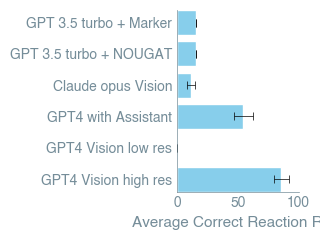

In [4]:
data = [
    ['model', 'correct reaction rate', 'standard deviation'],
    ('GPT4 Vision high res', 85.86, 6.31), 
    ('GPT4 Vision low res', 0.00, 0.00), 
    ('GPT4 with Assistant', 54.55, 8.02), 
    ('Claude opus Vision', 11.46, 3.33), 
    ('GPT 3.5 turbo + NOUGAT', 15.15, 0.00), 
    ('GPT 3.5 turbo + Marker', 15.15, 0.00)
]

models = [item[0] for item in data[1:]] 
correct_reaction_rates = [item[1] for item in data[1:]]
standard_deviations = [item[2] for item in data[1:]]


plt.style.use('lamalab.mplstyle')

fig, ax = plt.subplots()
ax.barh(y=np.arange(len(models)), width=correct_reaction_rates, xerr=standard_deviations,
        capsize=4, color='skyblue', error_kw={'elinewidth': 0.5, 'capsize': 3, 'capthick': 0.5})

plt.xlabel('Average Correct Reaction Rate') 
plt.yticks(ticks=np.arange(len(models)), labels=models)  
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

ax.set_xlim(0, 100)
plt.tight_layout()
plt.show()

fig.savefig('comparison_of_standard_deviations.png',bbox_inches='tight',dpi=300)

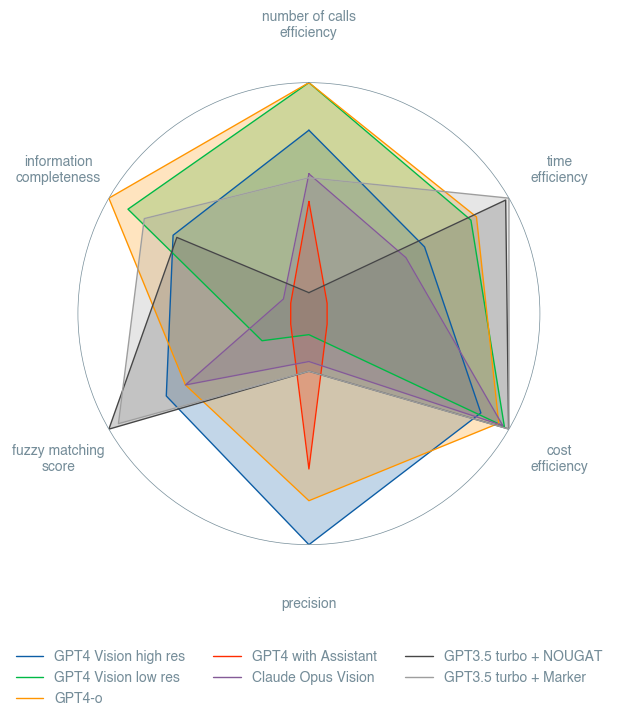

In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset
columns = [
    'model', 'number of calls\nefficiency', 'time\nefficiency', 'cost\nefficiency',
    'precision', 'fuzzy matching\nscore', 'information\ncompleteness'
]

data_list = [
    ('GPT4 Vision high res', 14.0, 537.81, 1.51, 86.0, 0.73, 13.99),
    ('GPT4 Vision low res', 10.0, 328.0, 0.29, 0.0, 0.63, 9.53),
    ('GPT4-o', 10.0, 302.85, 0.58, 68.0, 0.71, 7.64),
    ('GPT4 with Assistant', 20.0, 978.97, 9.50, 55.0, 0.60, 25.62),
    ('Claude Opus Vision', 17.67, 622.13, 0.37, 11.0, 0.71, 24.90),
    ('GPT3.5 turbo + NOUGAT', 27.67, 170.67, 0.07, 15.0, 0.79, 14.36),
    ('GPT3.5 turbo + Marker', 18.0, 155.73, 0.05, 15.0, 0.78, 11.14)
]

plt.style.use('lamalab.mplstyle')

# Create a DataFrame
new_data = pd.DataFrame(data_list, columns=columns)

# Normalize the features
# Inverting 'cost', 'execution time', 'number of model calls' and 'information completeness' so that lower is better
for feature in ['cost\nefficiency', 'time\nefficiency', 'number of calls\nefficiency', 'information\ncompleteness']:
    new_data[feature] = 1 - (new_data[feature] - new_data[feature].min()) / (new_data[feature].max() - new_data[feature].min())

# Normalizing other features so that higher is better
for feature in ['precision', 'fuzzy matching\nscore']:
    new_data[feature] = (new_data[feature] - new_data[feature].min()) / (new_data[feature].max() - new_data[feature].min())

# Add 0.1 to all normalized values
for feature in columns[1:]:
    new_data[feature] += 0.1

# Prepare to plot the radar chart with normalized data
num_vars = len(columns[1:])  # Exclude 'model' for plotting
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()  # Split the circle into even parts
angles += angles[:1]  # Complete the loop

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable and add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(columns[1:], wrap=True)  # Exclude 'model' from labels
ax.tick_params(axis='x', which='major', pad=35)

# Plot each model
for i, model in enumerate(new_data['model']):
    values = new_data.iloc[i, 1:].tolist()  # Exclude 'model' for plotting
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=model)
    ax.fill(angles, values, alpha=0.25)

# Add legend and show plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
ax.grid(True)  # Show the grid
ax.set_yticklabels([])  # Hide radial ticks

ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# Save the plot as a file
fig.savefig('comparison_of_models.pdf',bbox_inches='tight',dpi=300)
# Show the plot
plt.show()


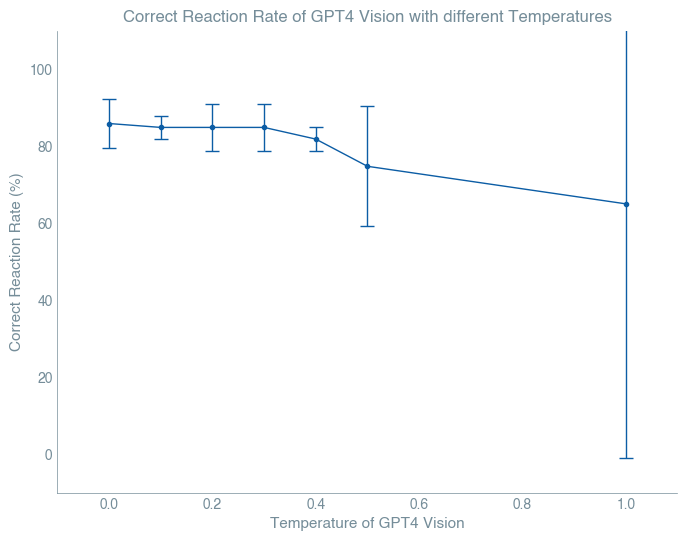

In [6]:
data = [
    ['temperature', 'correct reaction score', 'standard deviation'],
    (0.0, 85.86, 6.31),
    (0.1, 84.85, 3.03),
    (0.2, 84.85, 6.06),
    (0.3, 84.85, 6.06),
    (0.4, 81.82, 3.03),
    (0.5, 74.75, 15.55),
    (1.0, 65,66, 17.50)
]

plt.style.use('lamalab.mplstyle')

temperatures = [item[0] for item in data[1:]]
correct_reaction_scores = [item[1] for item in data[1:]] 
standard_deviations = [item[2] for item in data[1:]] 

# Plot the line chart with error bars
plt.figure(figsize=(8, 6))
plt.errorbar(temperatures, correct_reaction_scores, yerr=standard_deviations, fmt='-o', capsize=5)

# Set the labels and title
plt.xlabel('Temperature of GPT4 Vision')
plt.ylabel('Correct Reaction Rate (%)')
plt.title('Correct Reaction Rate of GPT4 Vision with different Temperatures')

plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')
plt.xlim(-0.1, 1.1)
plt.ylim(-10, 110)

output_file_path = 'comparison_of_temperatures.png' 
plt.savefig(output_file_path, bbox_inches='tight', dpi=300)
plt.show()

In [7]:
import matplotlib.pyplot as plt
from crossref.restful import Works
import seaborn as sns
import json
import matplotlib as mpl


def load_json(file_path):
    with open(file_path, 'r') as handle:
        return json.load(handle)

mpl.style.use('lamalab.mplstyle')

data = load_json('../../doi_extraction/doi_output.json')
doi_list = data['doi_list']

works = Works()
years = []

for doi in doi_list:
    try:
        meta = works.doi(doi)
        years.append(meta['published']['date-parts'][0][0])
    except Exception:
        pass

FileNotFoundError: [Errno 2] No such file or directory: '../../doi_extraction/doi_output.json'

In [ ]:
fig, ax = plt.subplots()

print(max(years), min(years))

plt.style.use('lamalab.mplstyle')

sns.distplot(years, ax=ax, kde_kws={'cut': 0, 'color': '#4093C3'}, color= '#92C4DE')
ax.set_xlabel('Year')
plt.xlim(1940,2001)
fig.tight_layout()

plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')
ax.grid(False)

fig.savefig('paper_year_dist.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
import json
import matplotlib.pyplot as plt

json_file_path = '../rxn_const.json'
with open(json_file_path, 'r') as file:
        data = json.load(file)

mpl.style.use('lamalab.mplstyle')

test_constants = [item['constants'] for item in data['test_data'] if 'constants' in item]
model_constants = [item['constants'] for item in data['model_data'] if 'constants' in item]

        
flat_test_constants = [constant for sublist in test_constants for constant in sublist]
flat_model_constants = [constant for sublist in model_constants for constant in sublist]

       
plt.figure(figsize=(10, 6))
plt.scatter(flat_test_constants, flat_model_constants, color='blue', alpha=0.5)
plt.xlabel('test constants')
plt.ylabel('model constants')
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')
plt.xlim(-0.5, 16)
plt.ylim(-0.5, 16)

valid_test_constants = [value for value in flat_test_constants if value is not None]
valid_model_constants = [value for value in flat_model_constants if value is not None]

max_value = max(max(valid_test_constants), max(valid_model_constants))
plt.plot([0, max_value], [0, max_value], 'k--', label='Diagonal line')

output_file_path = 'comparison_of_model_and_test_constants.png' 
plt.savefig(output_file_path, bbox_inches='tight', dpi=300)

plt.show()
        

In [ ]:
json_file_path = '../temp.json'
with open(json_file_path, 'r') as file:
        data = json.load(file)

mpl.style.use('lamalab.mplstyle')

test_temperatures = [temp['temperature'] for sublist in data['test_data'] for temp in sublist if 'temperature' in temp]
model_temperatures = [temp['temperature'] for sublist in data['model_data'] for temp in sublist if 'temperature' in temp]

plt.figure(figsize=(10, 6))
plt.scatter(test_temperatures, model_temperatures, color='blue', alpha=0.5)
plt.xlabel('test temperatures')
plt.ylabel('model temperatures')
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

valid_test_temp = [value for value in test_temperatures if value is not None]
valid_model_temp = [value for value in model_temperatures if value is not None]

max_value = max(max(valid_test_temp), max(valid_model_temp))
plt.plot([0, max_value], [0, max_value], 'k--') 

plt.xlim(-2, 160)
plt.ylim(-2, 160)

output_file_path = 'comparison_of_model_and_test_temperatures.png' 
plt.savefig(output_file_path, bbox_inches='tight', dpi=300)

plt.show()

In [ ]:
data = [
    ['model', 'precision','precision stand. dev.', 'recall', 'recall stand. dev.'],
    ('GPT4 Vision high res', 0.81, 0.10, 0.86, 0.06), 
    ('GPT4 Vision low res', 0.00, 0.00, 0.0, 0.0), 
    ('GPT4 with Assistant', 0.71, 0.09, 0.55, 0.08), 
    ('Claude opus Vision', 0.1, 0.04, 0.11, 0.03), 
    ('GPT 3.5 turbo + NOUGAT', 0.19, 0.03, 0.15, 0.0), 
    ('GPT 3.5 turbo + Marker', 0.2, 0.0, 0.15, 0.0)
]

plt.style.use('lamalab.mplstyle')

models = [item[0] for item in data[1:]]
precisions = [item[1] for item in data[1:]]
precision_stds = [item[2] for item in data[1:]]
recalls = [item[3] for item in data[1:]]
recall_stds = [item[4] for item in data[1:]]

# Number of models
n_models = len(models)

# Creating bar positions
x = range(n_models)
x_precision = [xi - 0.15 for xi in x]
x_recall = [xi + 0.15 for xi in x]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x_precision, precisions, yerr=precision_stds, width=0.3, label='Precision', capsize=5)
ax.bar(x_recall, recalls, yerr=recall_stds, width=0.3, label='Recall', capsize=5)

# Labels and title
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_ylabel('Score')
ax.legend()
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

plt.tight_layout()

fig.savefig('comparison_of_precision_&_recall.png',bbox_inches='tight',dpi=300)

plt.show()

In [ ]:
data = [
    ['model', 'matching monomers rate','standard dev.'],
    ('GPT4 Vision high res', 0.0, 0.0), 
    ('GPT4 Vision low res', 30.30, 3.03), 
    ('GPT4 with Assistant', 13.13, 4.63), 
    ('Claude opus Vision', 17.17, 7.0), 
    ('GPT 3.5 turbo + NOUGAT', 63.64, 0.0), 
    ('GPT 3.5 turbo + Marker', 60.61, 5.25)
]

models = [item[0] for item in data[1:]]
matching_rates = [item[1] for item in data[1:]]
standard_devs = [item[2] for item in data[1:]]

inverted_matching_rates = [100 - rate for rate in matching_rates]

# Creating the bar chart with horizontal orientation for inverted rates
fig, ax = plt.subplots(figsize=(10, 6))
y_positions = range(len(models))

ax.barh(y_positions, inverted_matching_rates, xerr=standard_devs, color='skyblue', capsize=5)
ax.set_yticks(y_positions)
ax.set_yticklabels(models)
ax.set_xlabel('Matching Monomers Rate (%)')

# Display the plot
plt.tight_layout()
fig.savefig('comparison_of_monomer_matching_rate.png',bbox_inches='tight',dpi=300)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = [
    ['r1', 'r2'],
    (0.25, 0.63), 
    (1.06, 0.1), 
    (0.33, 0.78), 
    (0.63, 0.31),
    (0.46, 0.27), 
    (1.06, 0.1),
    (0.33, 0.78),
    (0.63, 0.32),
    (2.16, 0.87),
    (1.63, 1.81),
    (0.99, 0.56),
    (1.18, 0.29),
    (0.48, 1.28),
    (1.84, 0.77),
    (1.38, 0.36),
    (0.63, 1.18),
    (1.55, 0.55),
    (1.26, 0.209),
    (0.78, 1.25),
    (0.68, 0.48)
]

plt.style.use('lamalab.mplstyle')

axis_labels = data[0]
points = data[1:]

# Unzip the points into separate lists
x_values, y_values = zip(*points)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='blue', marker='o', label='Data Points')
plt.xlabel('r1-values')
plt.ylabel('r2-values')
plt.grid(True)
plt.xlim(0, 2.25)
plt.ylim(0, 2.25)
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

plt.savefig('r-value_distribution.png',bbox_inches='tight',dpi=300)

plt.show()

In [ ]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

json_file_path = '../PDF_from_scidownl/enhanced_doi_list.json'
df = pd.read_json(json_file_path)
df = df.dropna(subset=['rxn_number'])
df = df[pd.to_numeric(df['rxn_number'], errors='coerce').notnull()]


Q1 = df['rxn_number'].quantile(0.25)
Q3 = df['rxn_number'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


filtered_df = df[(df['rxn_number'] >= lower_bound) & (df['rxn_number'] <= upper_bound)]

num_outliers = len(df) - len(filtered_df)
print(f"Number of outliers: {num_outliers}")


fig, ax = plt.subplots()
sns.histplot(filtered_df['rxn_number'], kde=True, color='skyblue', ax=ax, line_kws={'color':'red', 'lw':2})

ax.set_xlabel('Reaction Number')
ax.set_ylabel('Frequency')

plt.savefig('reaction_number_frequency_with_density_line_no_outliers.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
plt.style.use('lamalab.mplstyle')

with open('../data_extraction/collected_data/extracted_data_collected.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# count reactions
entry_count = len(data)
print(f"Number of reactions: {entry_count}")

r_products = []
for entry in data:
    r_values = entry.get('r_values', {})
    constant_1 = r_values.get('constant_1')
    constant_2 = r_values.get('constant_2')
    if constant_1 is not None and constant_2 is not None:
        r_products.append(constant_1 * constant_2)

product_counts = Counter(r_products)

df = pd.DataFrame(list(product_counts.items()), columns=['Product', 'Frequency'])

fig, ax = plt.subplots(figsize=(10, 6))

all_products = list(range(int(min(df['Product'])), int(max(df['Product'])) + 1))
all_frequencies = [product_counts.get(product, 0) for product in all_products]

sns.histplot(df['Product'], kde=True, color='skyblue', ax=ax, line_kws={'color':'red', 'lw':2})

ax.set_xlabel('Product of r-Values')
ax.set_ylabel('Frequency')
ax.set_xlim(-10, 50) 

print(min(df['Product']), max(df['Product']))
plt.savefig('extracted_data_r_product.pdf', bbox_inches='tight', dpi=300)

plt.show()

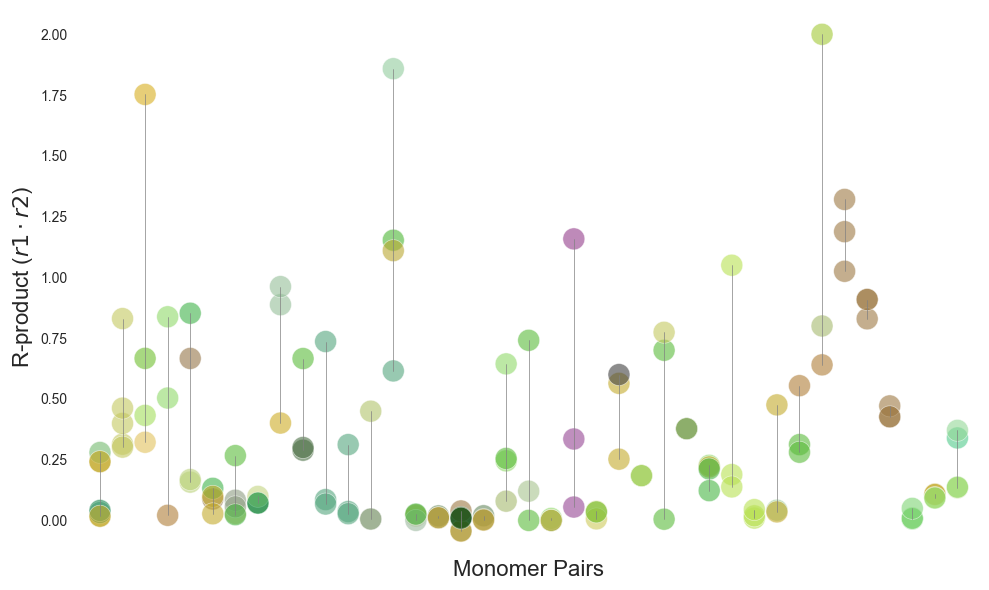

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Function to load data from a JSON file
def load_json(filename):
    with open(filename, 'r') as file:
        return json.load(file)

# Load your JSON file
filename = '../data_extraction_GPT-4o/collected_data/extracted_data_collected_without_fp.json'  # Replace with your actual file path
data = load_json(filename)

# Creating a DataFrame from JSON data
df = pd.DataFrame(data)

df['r1'] = df['r_values'].apply(lambda x: x['constant_1'] if isinstance(x, dict) and 'constant_1' in x else None)
df['r2'] = df['r_values'].apply(lambda x: x['constant_2'] if isinstance(x, dict) and 'constant_2' in x else None)
df['r1r2'] = df['r1'] * df['r2']

# Filter out rows with NaNs in monomer1, monomer2, or r1r2
df.dropna(subset=['monomer1_s', 'monomer2_s', 'r1r2'], inplace=True)

# Remove all entries with r1r2 greater than 2
df = df[df['r1r2'] <= 2]

# Function to standardize monomer pair order
def create_monomer_pair(row):
    return ' + '.join(sorted([row['monomer1'], row['monomer2']]))

# Standardize the monomer pair order
df['monomer_pair'] = df.apply(create_monomer_pair, axis=1)

# Filter out monomer pairs that appear less than 3 times
monomer_pair_counts = df['monomer_pair'].value_counts()
df = df[df['monomer_pair'].isin(monomer_pair_counts[monomer_pair_counts >= 3].index)]

# Normalizing the r-product values
scaler = MinMaxScaler()
df['r1r2_normalized'] = scaler.fit_transform(df[['r1r2']])

# Normalize temperature
temperature_scaler = MinMaxScaler()
df['temperature_normalized'] = temperature_scaler.fit_transform(df[['temperature']])

# Assign unique colors to each solvent
solvents = df['solvent'].unique()
solvent_colors = {solvent: plt.cm.tab20(i / len(solvents)) for i, solvent in enumerate(solvents)}

# Combine temperature and solvent color information
def combine_color(row):
    temp_color = plt.cm.viridis(row['temperature_normalized'])
    solvent_color = np.array(solvent_colors[row['solvent']][:3])
    combined_color = (temp_color[:3] + solvent_color) / 2
    return combined_color

df['combined_color'] = df.apply(combine_color, axis=1)

# Plotting all r-products for each monomer pair with combined temperature and solvent coloring
plt.figure(figsize=(10, 6))
monomer_pairs = df['monomer_pair'].unique()
positions = range(len(monomer_pairs))

# Plot the data points and add lines between min and max r-product values for each monomer pair
for i, monomer_pair in enumerate(monomer_pairs):
    subset = df[df['monomer_pair'] == monomer_pair]
    min_r1r2 = subset['r1r2'].min()
    max_r1r2 = subset['r1r2'].max()
    plt.scatter([positions[i]] * len(subset), subset['r1r2'], c=subset['combined_color'], alpha=0.6, edgecolors='w', linewidth=0.5, s=250)
    plt.plot([positions[i], positions[i]], [min_r1r2, max_r1r2], color='grey', linestyle='-', linewidth=0.5)

plt.xlabel('Monomer Pairs', fontsize=16)
plt.ylabel(r'R-product ($r1 \cdot r2$)', fontsize=16)
plt.xticks(positions, [''] * len(monomer_pairs))
plt.grid(False)
plt.tight_layout()
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

plt.xlim(-1.0, len(monomer_pairs) - 0.0)
plt.ylim(-0.1, 2.1)

plt.savefig('r_product_conditions.pdf', bbox_inches='tight', dpi=300)
# Save the color list to a .mplstyle file
color_list = [solvent_colors[solvent] for solvent in solvents]
with open('custom_colors.mplstyle', 'w') as f:
    f.write(f"axes.prop_cycle: cycler('color', {color_list})\n")

# Display plot
plt.show()


In [ ]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Daten laden
file_path = '../data_extraction/collected_data/enhanced_doi_list_unique.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# DataFrame erstellen
df = pd.DataFrame(data)

plt.style.use('lamalab.mplstyle')

# Plot erstellen
fig, ax = plt.subplots(figsize=(6, 4))  # Kleinere Plotgröße
sns.swarmplot(y='precision', data=df, ax=ax, size=7, linewidth=1, palette=['#92C4DE'])
ax.set_ylabel('Precision', fontsize=16)  # Größere Schriftgröße für y-Achse


# Achsen-Tick-Labels vergrößern
ax.tick_params(axis='both', which='major', labelsize=14)

# Reduzieren der x-Achsen-Breite
ax.set_xlim(-0.3, 0.3)

plt.grid(False)
plt.tight_layout()
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

fig.savefig('swarmplot_precision_frequency.pdf', bbox_inches='tight', dpi=300)
plt.show()